# Import Libraries and Dependencies

In [ ]:
!pip install google-play-scraper

# Import google play scraper library to access the app's review from google playstore
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for visualization
from sklearn.metrics import accuracy_score

import datetime as dt  # for date
import re  # For regex
import string  # String constant for punctuation
from nltk.tokenize import word_tokenize  # Tokenize teks
from nltk.corpus import stopwords  # Stopwords list

from wordcloud import WordCloud  # Visualize for word cloud

import nltk  # Import NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Dataset for tokenization
nltk.download('stopwords')  # Dataset for stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Data Wrangling

## Data Gathering

### Scraping Dataset

In [ ]:
# Import google play scraper library to access the app's review from google playstore
from google_play_scraper import app, reviews_all, Sort

scrapreview = reviews_all(
    'com.spotify.music',          # App id
    lang='en',             # Language (default: 'en')
    country='us',          # Country (default: 'us')
    sort=Sort.MOST_RELEVANT, # Sort by (default: Sort.MOST_RELEVANT)
    count=10000             # Maximum reviews number to be scraped
)

In [ ]:
# save to csv file
import csv

with open('app_review.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Write column header
    for review in scrapreview:
        writer.writerow([review['content']])  # Write review content

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('app_review.csv', index=False)

### Load Dataset

In [ ]:
# Membuat DataFrame dari hasil scrape yang sudah disimpan pada file 'ulasan_aplikasi.csv)
# app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df = pd.read_csv('app_review.csv')

In [ ]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c5de7d25-db91-4088-b575-32040d2f3fc3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I usually love Spotify, I even have premium, b...",1,975,9.0.40.391,2025-05-06 04:36:58,Hi. Have you tried a quick reinstall? If that ...,2025-05-06 05:26:01,9.0.40.391
1,dc8d3fbc-9c5a-4c59-a3a5-498594f30899,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Why in the world did they have to put a pay wa...,1,112,9.0.40.391,2025-05-14 05:52:21,"Hey. If you’re on our free service, you can on...",2025-05-16 11:44:04,9.0.40.391
2,87ab6fd3-665e-4563-8326-b9ce5fa9a140,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,SHUFFLE absolutely SUCKS. Playing the same exa...,2,176,9.0.42.529,2025-05-09 23:01:51,Hi! We’d recommend restarting your device to s...,2023-04-25 04:32:45,9.0.42.529
3,24703eef-25b2-4bce-ab87-ff3d1210e805,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It is what you pay for these days. And ever si...,3,2,9.0.44.478,2025-05-18 19:05:59,NaN,NaN,9.0.44.478
4,3dfe850c-5bda-4370-8b37-be138ff96c00,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Spotify again is pushing updates and requireme...,2,96,9.0.44.478,2025-05-14 12:00:29,We’d suggest heading over to support.spotify.c...,2025-05-16 15:28:24,9.0.44.478


In [ ]:
app_reviews_df = app_reviews_df.sample(n=50000, random_state=42)

## Data Assessing

In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 41768 to 61985
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  46029 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          7595 non-null   object
 9   repliedAt             7595 non-null   object
 10  appVersion            46029 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


## Data Cleaning

In [ ]:
# Delete the duplicate row
clean_df = app_reviews_df.drop_duplicates()

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 41768 to 61985
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  46029 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          7595 non-null   object
 9   repliedAt             7595 non-null   object
 10  appVersion            46029 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


# Preprocessing

## Removing Special Characters

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # delete mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # delete hashtag
    text = re.sub(r'RT[\s]', '', text) # delete RT (for tweets only)
    text = re.sub(r"http\S+", '', text) # delete link
    text = re.sub(r'[0-9]+', '', text) # delete number
    text = re.sub(r'[^\w\s]', '', text) # delete other special characters

    text = text.replace('\n', ' ') # replace new row with space
    text = text.translate(str.maketrans('', '', string.punctuation)) # replace punctuation
    text = text.strip(' ') # delete space from left and right side of the text
    return text

## Case Folding

In [ ]:
def casefoldingText(text): # Lower the text
    text = text.lower()
    return text

## Tokenizing

In [ ]:
def tokenizingText(text): # Tokenize the text
    text = word_tokenize(text)
    return text

## Stopwords & Slangwords

In [ ]:
def filteringText(text): # delete stopwords
    listStopwords = set(stopwords.words('english'))

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

In [ ]:
slangwords = {}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatizingText(text): # Reduce the word to its base
    # Create lemmatizer object
    lemmatizer = WordNetLemmatizer()

    words = text

    # Implement lemmatizing for each word
    lemma_words = [lemmatizer.lemmatize(word.lower()) for word in words]

    # Join the lemmatized word
    lemmatized_text = ' '.join(lemma_words)

    return lemmatized_text

[nltk_data] Downloading package wordnet to /root/nltk_data...


## Applying

In [ ]:
# clean the text and save it to text_clean
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Lower the text and save it to text_casefoldingText
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Convert the slang word and save it to text_slangword
# clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
# Tokenize the text and save it to text_tokenizingText
clean_df['text_tokenizingText'] = clean_df['text_casefoldingText'].apply(tokenizingText)

# Delete stopwords and save it to text_stopword
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# reduce the word to its base word
clean_df['text_lemmatized'] = clean_df['text_stopword'].apply(lemmatizingText)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 41768 to 61985
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  46029 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          7595 non-null   object
 9   repliedAt             7595 non-null   object
 10  appVersion            46029 non-null  object
 11  text_clean            50000 non-null  object
 12  text_casefoldingText  50000 non-null  object
 13  text_tokenizingText   50000 non-null  object
 14  text_stopword         50000 non-null  object
 15  text_lemmatized       50000 non-null 

## Labelling

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def sentiment_analysis_lexicon(text):
    # Use vader lexicon
    sentence = ' '.join(text)
    scores = sia.polarity_scores(text)
    compound_score = scores['compound']

    # Decide polarity based on the compound score
    if compound_score >= 0.05:
        polarity = 'positive'
    elif compound_score <= -0.05:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return compound_score, polarity

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
clean_df['text_lemmatized'].head()

,text_lemmatized
41768,well app favorite song app perfect
26298,listened spotify year pain give low score new ...
67265,forced shuffle play free user recent update ma...
23766,there interesting feature appreciate recommend...
47094,good early day even cant listen song anytime c...


In [ ]:
results = clean_df['text_lemmatized'].apply(sentiment_analysis_lexicon)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    33100
negative    14820
neutral      2080
Name: count, dtype: int64


# Feature Extraction & Modelling

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer setup
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(clean_df['text_lemmatized'])

# convert to number sequence
sequences = tokenizer.texts_to_sequences(clean_df['text_lemmatized'])

# padding to standardize the length
maxlen = 100
X_padded = pad_sequences(sequences, padding='post', maxlen=maxlen)

In [ ]:
from sklearn.model_selection import train_test_split
y = clean_df['polarity'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values

# use one hot encoder
# y = pd.get_dummies(clean_df['polarity']).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))  # Automatic word embedding
model.add(Bidirectional(SimpleRNN(units=32)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes: neg, neu, pos

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.92):
      print("\nAkurasi telah mencapai >=92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=128, callbacks=[callbacks])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.6563 - loss: 0.7795
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.7820 - loss: 0.5466
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.8396 - loss: 0.4294
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.8702 - loss: 0.3603
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - accuracy: 0.8898 - loss: 0.3051
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9082 - loss: 0.2598
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9231 - loss: 0.2231
Akurasi telah mencapai >=92%!
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.9231 - loss: 0.2231


In [ ]:
# evaluate the model
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 93s 9ms/step - accuracy: 0.8071 - loss: 0.6335


[0.6278262138366699, 0.8052999973297119]

In [ ]:
model.save('model_simplernn.h5')

# Visualization

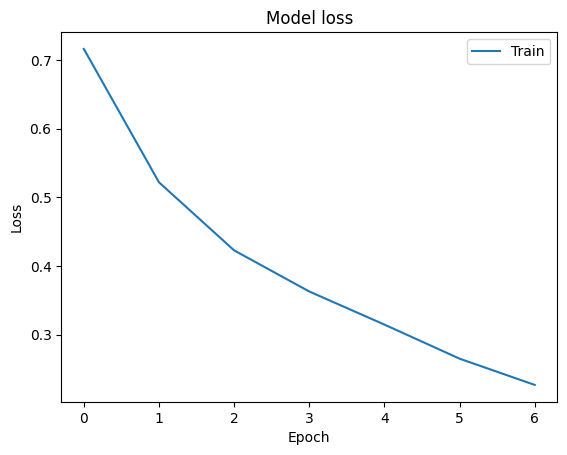

In [ ]:
# Plot the loss function for trained model
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

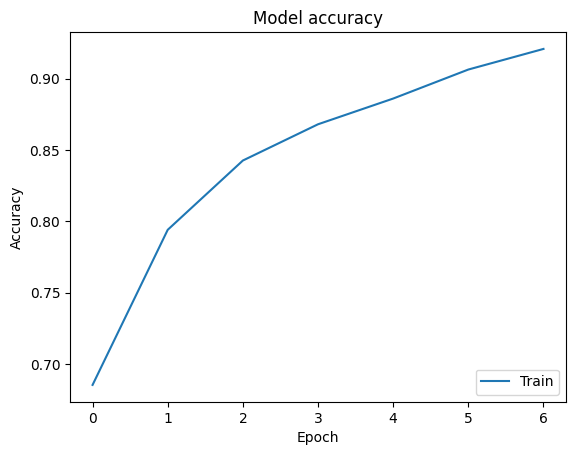

In [ ]:
# Plot the accuracy for trained model
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()